In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Tmax = 100
offset = 50
N = 100
R,X = np.meshgrid(np.linspace(2,4,N),np.linspace(1,0,N))

def f(X,R):
    return R * X * (1-X)

Z = f(X,R)

plt.figure()
plt.xlabel('r')
plt.ylabel('x_s')

for i in range(0,Tmax):
    Z = f(Z,R)
    if i>offset:
        temp = Z.copy()
        temp[abs(temp-X) > 0.01] = 0
        plt.plot(R,temp,'.k')
    
plt.show()

<IPython.core.display.Javascript object>


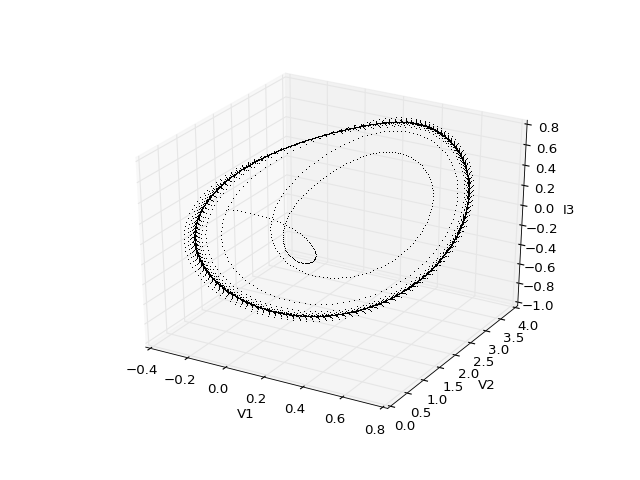

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook



C1 = 0.01
C2 = 0.1
L  = 0.32
R1 = 19.
R2 = 14.5
R3 = 0.1
RN = 6.9
Rnic = 6.9 #kOhm
a  = 2.295e-5
b  = 3.0038

def v1(t, v):
    ID = a * 2 * np.sinh(b * (v[1] - v[2]))
    return [(-v[0] * R3 + v[2]) / L,
            (v[1] * (1 / RN - 1 / R1) - ID - (v[1] - v[2]) / R2) / C1,
            (ID + (v[1] - v[2]) / R2 - v[0]) / C2]


def Int(t0,v0):
    r = ode(v1).set_integrator('dopri5')
    r.set_initial_value( v0, t0)
    t1 = 100
    dt = 0.01
    
    while r.successful() and r.t < t1:
        temp = r.integrate(r.t+dt)
        ax.plot([temp[0]],[temp[1]],[temp[2]],',k')

v0 = np.array([0,0,0.5])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('I3')

Int(10,v0)

plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook



C1 = 0.01
C2 = 0.1
L  = 0.32
R1 = 19.
R2 = 14.5
R3 = 0.1
RN = 6.9
Rnic = 6.9 #kOhm
a  = 2.295e-5
b  = 3.0038

def v1(t, v):
    ID = a * 2 * np.sinh(b * (v[1] - v[2]))
    return [(-v[0] * R3 + v[2]) / L,
            (v[1] * (1 / RN - 1 / R1) - ID - (v[1] - v[2]) / R2) / C1,
            (ID + (v[1] - v[2]) / R2 - v[0]) / C2]


def Int(t0,v0):
    r = ode(v1).set_integrator('dopri5')
    r.set_initial_value( v0, t0)
    t1 = 500
    dt = 0.01
    
    prev = np.zeros(3)
    while r.successful() and r.t < t1:
        temp = r.integrate(r.t+dt)
        print(temp)
        if prev[1] < 0 and temp[1] > 0:
            plt.plot([temp[0]],[temp[2]],'ok')
        prev = temp

v0 = np.array([0,0,0.5])


fig = plt.figure()


Int(10,v0)

plt.show()

<IPython.core.display.Javascript object>

[ 0.01553991  0.03484602  0.49589734]
[ 0.03088345  0.07017224  0.49052605]
[ 0.04599214  0.10590334  0.48391931]
[ 0.06082874  0.14196463  0.47611336]
[ 0.07535728  0.17828229  0.46714728]
[ 0.08954317  0.2147835   0.45706295]
[ 0.10335328  0.25139667  0.44590481]
[ 0.11675599  0.2880516   0.43371977]
[ 0.12972131  0.3246797   0.42055701]
[ 0.14222088  0.36121414  0.40646782]
[ 0.15422808  0.39759003  0.39150545]
[ 0.16571806  0.43374455  0.37572491]
[ 0.17666778  0.46961718  0.35918283]
[ 0.18705607  0.50514978  0.34193726]
[ 0.19686366  0.54028675  0.32404746]
[ 0.20607318  0.57497514  0.3055738 ]
[ 0.21466926  0.60916479  0.28657751]
[ 0.22263845  0.64280842  0.26712053]
[ 0.22996932  0.67586172  0.24726532]
[ 0.2366524   0.7082834   0.22707468]
[ 0.24268025  0.74003532  0.2066116 ]
[ 0.24804738  0.7710825   0.18593903]
[ 0.25275031  0.80139318  0.16511977]
[ 0.25678749  0.83093883  0.14421625]
[ 0.26015936  0.85969425  0.12329037]
[ 0.26286824  0.88763751  0.10240337]
[ 0.26491837

<IPython.core.display.Javascript object>


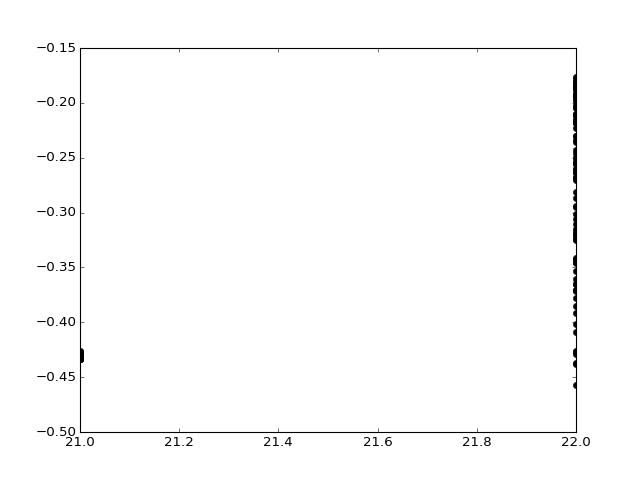

19.0
20.0
21.0
22.0


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook



C1 = 0.01
C2 = 0.1
L  = 0.32
R2 = 14.5
R3 = 0.1
RN = 6.9
Rnic = 6.9 #kOhm
a  = 2.295e-5
b  = 3.0038

def v1(t, v, R1):
    ID = a * 2 * np.sinh(b * (v[1] - v[2]))
    return [(-v[0] * R3 + v[2]) / L,
            (v[1] * (1 / RN - 1 / R1) - ID - (v[1] - v[2]) / R2) / C1,
            (ID + (v[1] - v[2]) / R2 - v[0]) / C2]


def Int(t0,v0,R1):
    r = ode(v1).set_integrator('dopri5')
    r.set_initial_value( v0, t0).set_f_params(R1)
    r.integrate(10)
    
    t1 = 500
    dt = 0.01
    
    prev = np.zeros(3)
    while r.successful() and r.t < t1:
        temp = r.integrate(r.t+dt)
        if prev[1] < 0 and temp[1] > 0:
            plt.plot([R1],[temp[0]],'ok')
        prev = temp

v0 = np.array([0,0,0.5])


fig = plt.figure()

for R in np.arange(19.,23.,1):
    print(R)
    Int(0,v0,R)

plt.show()

In [39]:
np.arange(19.,23.,3)

array([ 19.,  22.])